In [2]:
# Chips

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

def science_plot(fontsize = 8):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()



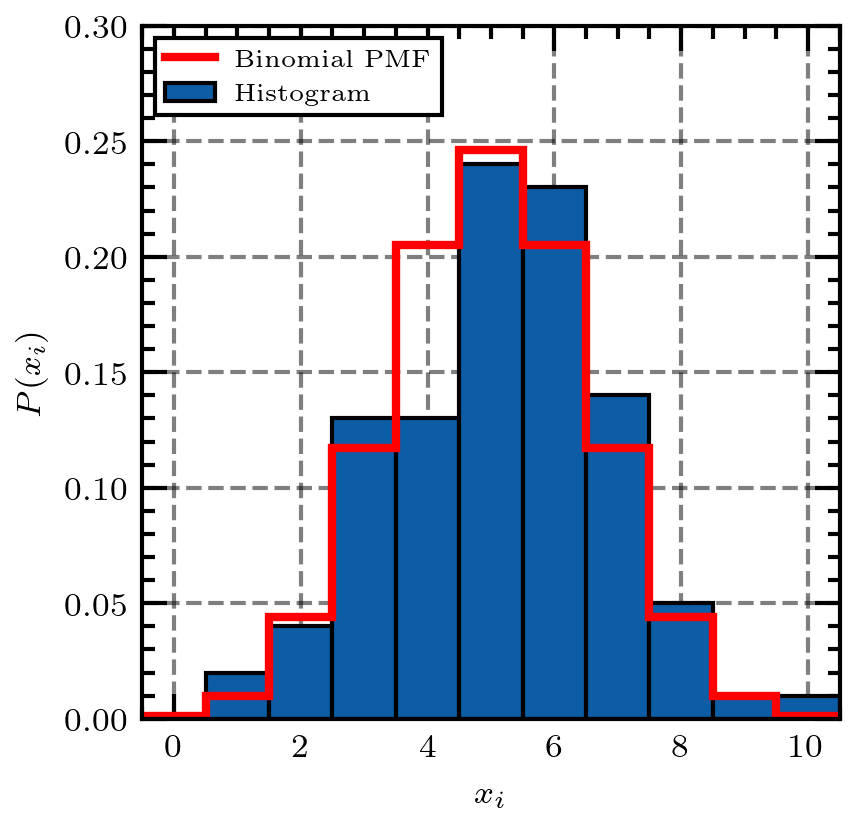

5.16
<x> = 5.16
sigma = 1.718836815989232
most probable macroscopic state = 5
5.0


In [3]:
# Coin Data
def binomial_pmf(k, n, p):
    import math
    k = np.asarray(k)  # Ensure k is an array
    return np.array([math.comb(n, ki) * (p ** ki) * ((1 - p) ** (n - ki)) for ki in k])

N = 100
indices = np.array([0,1,2,3,4,5,6,7,8,9,10])
heights = np.array([0,2,4,13,13,24,23,14,5,1,1])
values = np.repeat(indices, heights)

plt.figure(figsize=(3, 3), dpi=300)
plt.bar(indices, heights / N, width=1, edgecolor='k', label="Histogram")

binom_pmf_vals = binomial_pmf(indices, 10, 0.5)
plt.stairs(binom_pmf_vals,np.arange(0,12,1)-0.5, color='r', linewidth = 2, label="Binomial PMF")

plt.xlabel('$x_i$')
plt.ylabel('$P(x_i)$')
plt.xlim(-0.5, 10.5)
plt.ylim(0,0.30)
plt.xticks(range(0,12,2))
plt.legend(loc = 'upper left', prop={'size': 6})
plt.show()

exp_value = np.sum(heights*indices)/np.sum(heights)
print(exp_value)
print('<x> =',np.mean(values))
standard_dev = np.std(values)
print('sigma =',standard_dev)
print('most probable macroscopic state = 5')
print(np.sqrt(100*0.5**2))

51.29278400053253


<Figure size 900x900 with 0 Axes>

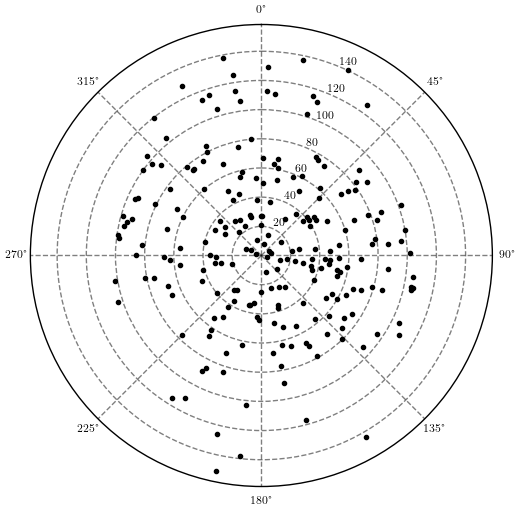

<r> =  65.60085836909872
sigma =  52.341912068119306


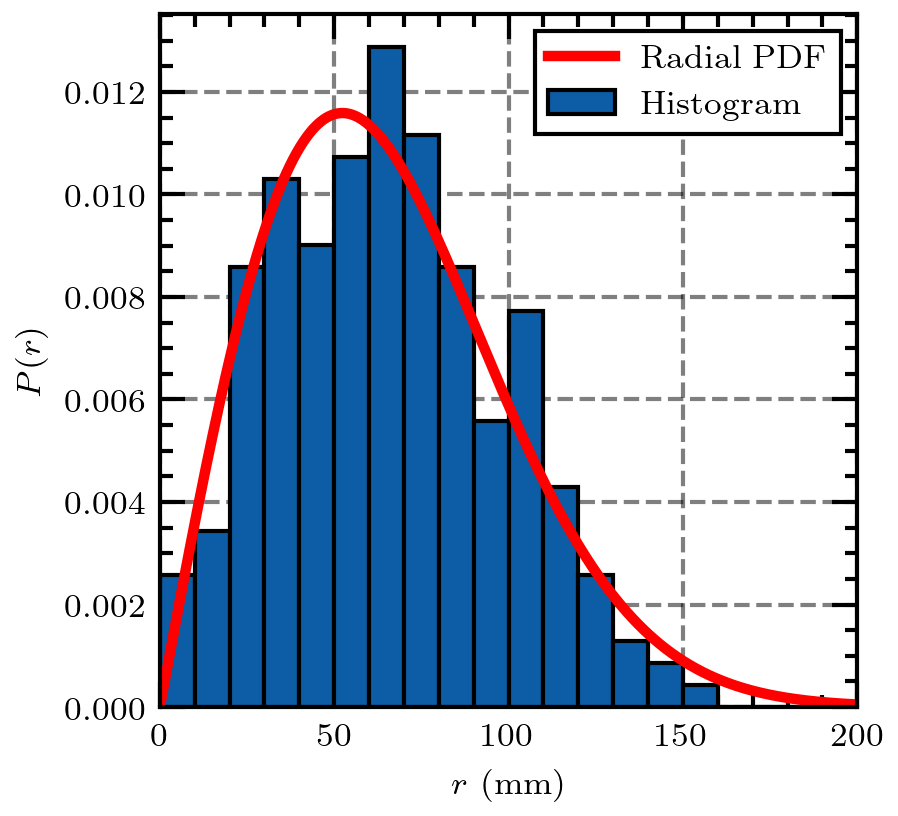

In [4]:
target_path = r"C:\Users\verci\Documents\Python Code\Physics157\CH1\targets.csv"
target_file = pd.read_csv(target_path, sep = ',')
# target_file = target_file.dropna()
# print(target_file)
# bins = target_file['bins']
# freqs = target_file['freqs']
theta = target_file['theta']
r = target_file['r']

x = r*np.cos(theta)
y = r*np.sin(theta)
std_ave = np.sqrt((np.std(x)**2 +np.std(y)**2)/2)
print(std_ave)
# Scatter_diagram
plt.figure(figsize=(3,3), dpi = 300)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(np.radians(theta), r, color = 'k', marker ='.')
ax.set_theta_zero_location('N')  # Set 0 degrees to be at the top
ax.set_theta_direction(-1)  # Set counterclockwise as the positive direction
# ax.legend()
plt.show()

# Radial_histogram
# Step 4: Compute histogram of r
dr = 10
bin_edges = np.arange(0, 200+dr, dr) 
heights, bins = np.histogram(r, bins=bin_edges, density=False)  # Raw counts
bin_width = bins[1] - bins[0]
bin_centers = (bins[:-1] + bins[1:]) / 2  # Compute bin centers

exp_value = np.sum(bin_centers*heights)/np.sum(heights)
exp_sigma = np.sqrt(2/np.pi)*exp_value
print('<r> = ',exp_value)
print('sigma = ',exp_sigma)
# Step 5: Define the theoretical function f(r) = (r / sigma^2) * exp(-r^2 / (2 sigma^2))
def radial_distribution(r, sigma):
    return (r / sigma**2) * np.exp(-r**2 / (2 * sigma**2))

# Step 6: Compute theoretical values
r_f = np.linspace(0, 200, 1000+1)  # Smooth curve
f_r = radial_distribution(r_f, exp_sigma)

# Step 7: Scale f(r) to match histogram
A = np.sum(heights * bin_width) #/ np.trapezoid(f_r, r_f)  # Scaling factor
f_r_scaled = A * f_r  # Scale function to match histogram

plt.figure(figsize=(3,3), dpi = 300)
# Step 8: Plot histogram and scaled theoretical curve
plt.bar(bin_centers, heights / A, width=bin_width, edgecolor = 'k', label='Histogram')
plt.plot(r_f, f_r, color='r', linewidth=2.5, label='Radial PDF')

# Step 9: Labels and legend
plt.xlabel('$r$ (mm)')
plt.ylabel('$P(r)$')
# plt.title('Radial Distribution Fit')
plt.legend()
plt.xticks(range(0,250,50))
plt.xlim(0,200)
plt.show()

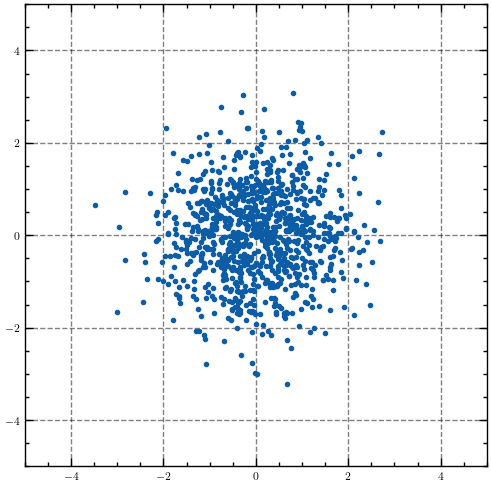

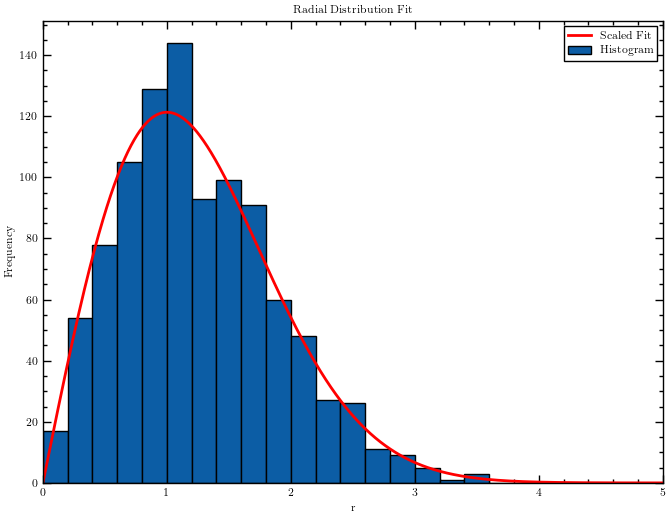

In [15]:
# Step 1: Generate 2D normally distributed points
size = 1000
sigma = 1
x = np.random.normal(0, sigma, size)
y = np.random.normal(0, sigma, size)

# Step 2: Scatter plot of the points
plt.scatter(x, y, marker='.')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal')
plt.show()

# Step 3: Compute radial distances
r = np.sqrt(x**2 + y**2)

# Step 4: Compute histogram of r
bin_num = 25#int(np.sqrt(size))
bin_edges = np.linspace(0, 5, bin_num+1)  # 50 bins from 0 to 5
heights, bins = np.histogram(r, bins=bin_edges, density=False)  # Raw counts
bin_width = bins[1] - bins[0]
bin_centers = (bins[:-1] + bins[1:]) / 2  # Compute bin centers

# Step 5: Define the theoretical function f(r) = (r / sigma^2) * exp(-r^2 / (2 sigma^2))
def radial_distribution(r, sigma):
    return (r / sigma**2) * np.exp(-r**2 / (2 * sigma**2))

# Step 6: Compute theoretical values
r_f = np.linspace(0, 5, 1000)  # Smooth curve
f_r = radial_distribution(r_f, sigma)

# Step 7: Scale f(r) to match histogram
A = np.sum(heights * bin_width) #/ np.trapezoid(f_r, r_f)  # Scaling factor
f_r_scaled = A * f_r  # Scale function to match histogram

# Step 8: Plot histogram and scaled theoretical curve
plt.bar(bin_centers, heights, width=bin_width, edgecolor = 'k', label='Histogram')
plt.plot(r_f, f_r_scaled, color='r', linewidth=2, label='Scaled Fit')

# Step 9: Labels and legend
plt.xlabel('r')
plt.ylabel('Frequency')
plt.title('Radial Distribution Fit')
plt.legend()
plt.grid()
plt.xlim(0,5)
plt.show()


In [6]:
print(target_file)
target_file['r'] = target_file['r'].astype(int)
target_file['theta'] = target_file['theta'].astype(int)
# Sort by theta in ascending order
target_file = target_file.sort_values(by='r')

# Iterate over rows using `.iterrows()`
print('r,theta')
for _, row in target_file.iterrows():
    print(f'{round(row['r'])},{round(row['theta'])}')


       r  theta
0      4    105
1      4    281
2      6     60
3      7     76
4      8    300
..   ...    ...
228  138    349
229  138    186
230  140     25
231  144    150
232  151    192

[233 rows x 2 columns]
r,theta
4,105
4,281
6,60
7,76
8,300
8,15
11,345
11,292
12,165
13,105
14,132
15,18
16,56
18,98
21,82
21,253
21,0
22,317
23,331
23,99
23,164
25,151
25,181
26,80
27,0
27,1
27,143
27,345
28,260
28,329
29,215
29,344
29,100
29,301
30,218
30,323
30,33
31,268
32,308
32,261
33,189
35,194
35,193
35,94
35,271
35,102
36,211
36,161
36,299
36,106
37,83
37,50
37,310
37,40
37,9
38,356
38,162
39,59
40,115
40,283
40,230
41,256
41,50
41,53
42,102
42,213
42,184
43,333
43,139
44,182
44,247
44,93
45,57
45,54
45,340
47,94
47,86
47,97
47,169
50,1
50,212
50,333
51,163
51,30
51,62
53,123
53,92
53,101
53,12
53,356
54,154
54,217
54,82
54,105
55,119
55,102
56,263
56,345
56,45
56,275
57,140
58,382
59,347
59,98
60,319
60,296
60,120
60,73
61,11
61,27
61,41
62,214
62,132
63,192
63,167
63,8
63,267
64,115
65

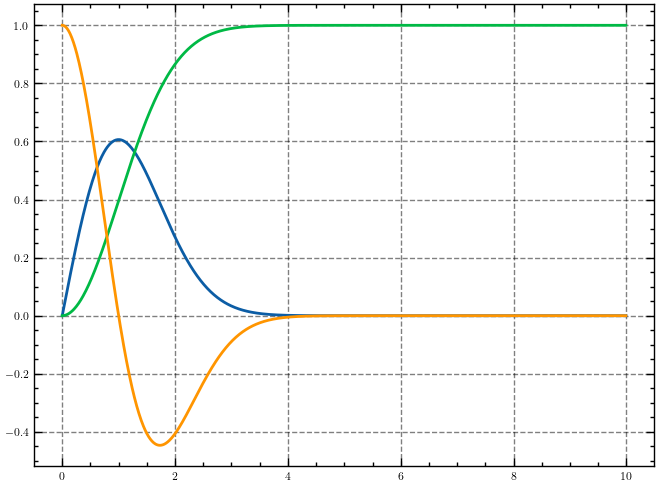

In [7]:
dr = 0.01
r = np.arange(0,10,dr)
f = radial_distribution(r,sigma=1)
# F =  np.insert(np.cumsum((f[:-1] + f[1:]) / 2),0,0) * dr
F = np.cumsum(f)*dr
df = np.gradient(f)/dr
plt.plot(r,f)
plt.plot(r,F)
plt.plot(r,df)
# plt.ylim(0,20)
plt.show()



C:\Users\verci\AppData\Local\Temp\ipykernel_14608\2659408008.py:9: RuntimeWarning: overflow encountered in exp
  boltzmann = ((2*h*c**2)/lambda_**5)*(1/(np.exp((h*c)/(lambda_*kB*T))-1))


(0.0, 1.0)

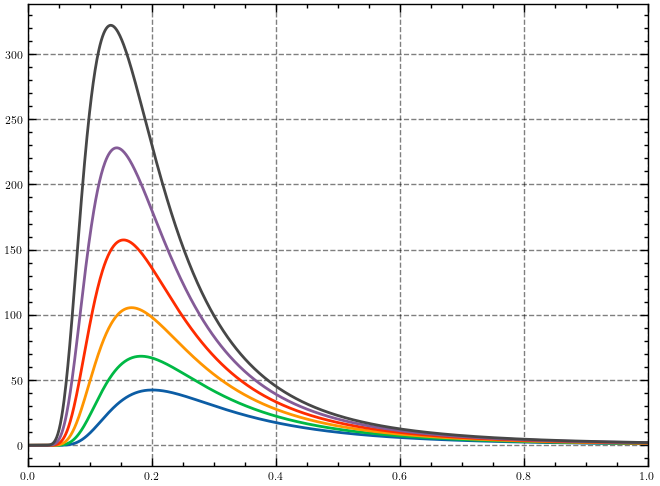

In [8]:
dlambda = 0.001
lambda_ = np.arange(dlambda,2,dlambda)
nu = 1/lambda_
T = 1
c = 1
h = 1
kB = 1
for T in [1,1.1,1.2,1.3,1.4,1.5]:
    boltzmann = ((2*h*c**2)/lambda_**5)*(1/(np.exp((h*c)/(lambda_*kB*T))-1))
    plt.plot(lambda_,boltzmann)
plt.xlim(0,1)

1.4210854715202004e-16 0
0 0
3.571428571353648 3.5714285714285716
0.09984990014999148 0.1
1.8898223650263133
0.31599034819119315
0.5971656271441689 0.5


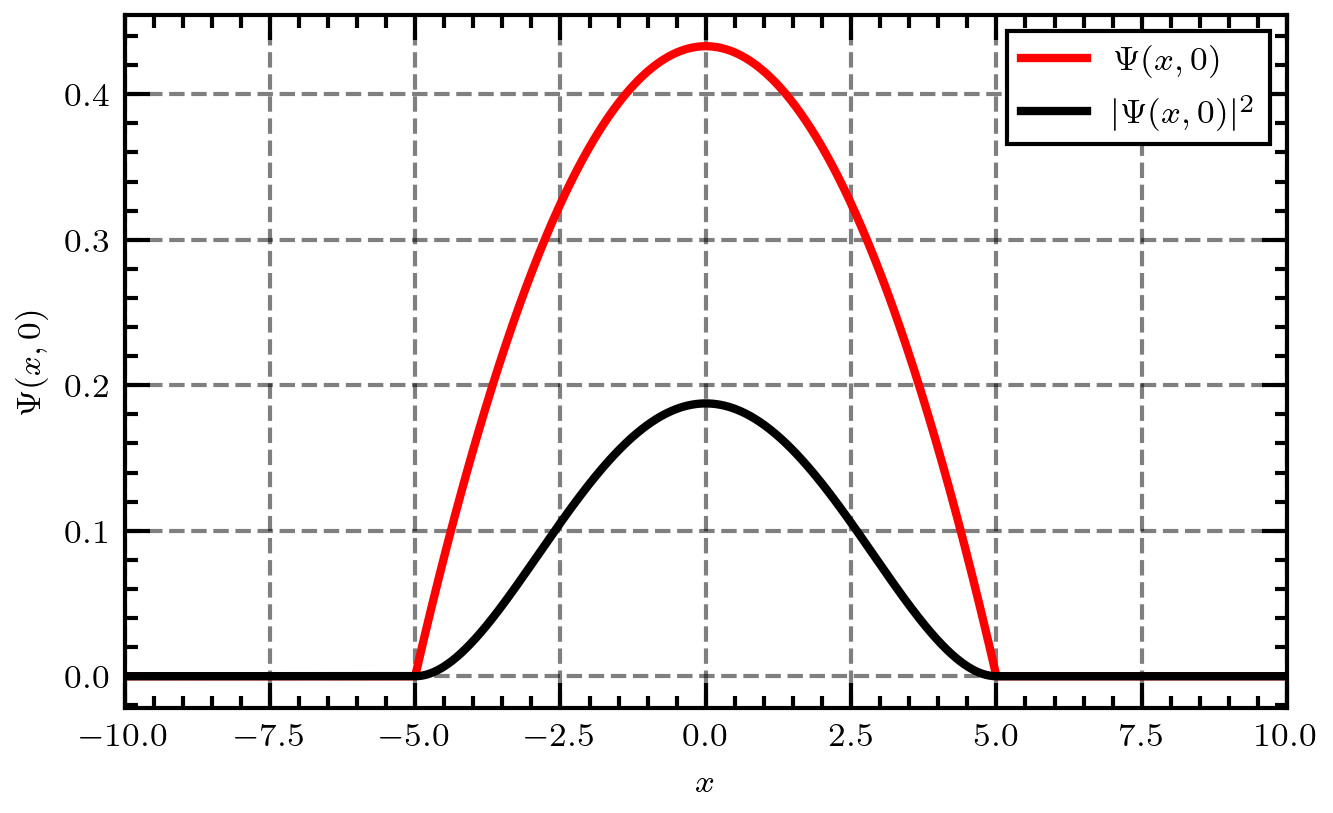

In [9]:
dx = 0.01
x = np.arange(-10,10,dx)
a = 5

def wave_func(x,a):
    A = np.sqrt(15 / (16*a**5))
    return np.where((-a <= x) & (x <= a), A * (a**2 - x**2), 0)

h = 1
psi = wave_func(x,a)
psi2 =  wave_func(x,a)**2

exp_x   = np.sum(x * psi2)*dx
exp_p   = 0
exp_x2  = np.sum(x**2 * psi2)*dx
exp_p2  = -h**2 * np.sum(psi * np.gradient(np.gradient(psi)/dx)/dx)*dx
sigma_x = np.sqrt(exp_x2-exp_x**2)
sigma_p = np.sqrt(exp_p2-exp_p**2)

print(exp_x,0)
print(exp_p,0)
print(exp_x2,a**2/7)
print(exp_p2, 5*h**2 / (2*a**2))
print(sigma_x)
print(sigma_p)
print(sigma_x*sigma_p, h/2)

plt.figure(figsize=(5,3), dpi = 300)
plt.plot(x,psi,color ='r', label = r'$\Psi(x,0)$')
plt.plot(x,psi2,color ='k', label = r'$|\Psi(x,0)|^2$')
#plt.plot(x,np.cumsum(psi2)*dx)
plt.xlabel(r'$x$')
plt.ylabel(r'$\Psi(x,0)$')
plt.xlim(-10,10)
plt.legend()
plt.show()
# plt.plot(x, np.cumsum(psi2)*dx)